# Introduction

Linear regression generally have the form of $Y_{i} = \theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2} + ...$ <br>
There are several ways to find the coefficients of the regression: <br>
1. Linear Algebra: $\hat{\theta} = (X^{T}X)^{-1}X^{T}Y$ (When X is invertible) <br>
2. Gradient Descent: In this case, we need to write out the loss function and try to minimize the loss. <br>
$\hspace{30mm}$ $F(x)$ = Loss Function = MSE = $ \frac{1}{n}\sum^{n}_{i=1} (Y_{i} - \hat{Y_{i}})^{2}$ <br>

In this part of the assignment, we will be using the second way to implement this linear regression model. More details about the model's implementation can be found in corresponding lectures.

### <font color='red'>ATTENTION: THERE ARE A TOTAL OF 4 QUESTIONS THAT NEED YOUR ANSWERS</font>

## Import necessary packages

You'll be implement your model in `LinearRegression.py` which should be put under the same directory as the location of `Linear_Regression.ipynb`. Since we have enabled `autoreload`, you only need to import these packages once. You don't need to restart the kernel of this notebook nor rerun the next cell even if you change your implementation for `LinearRegression.py` in the meantime.

A suggestion for better productivity if you never used jupyter notebook + python script together: you can split your screen into left and right parts, and have your left part displaying this notebook and have your right part displaying your `LinearRegression.py`

In [1]:
# Please do not change this code block
%load_ext autoreload
%autoreload 2

# import numpy, pandas, pyplot for arrays, dataframes, and visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import sklearn model to validate our custom model
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Please make sure that your `LinearRegression.py` is under the same folder as this .ipynb notebook
from LinearRegression import Linear_Regression

# Experiment 1: Perfect Data

In this part, we generate a dataset with a perfect linear relationship to test our model's performance. Here, we use the equation: $y = 5x + 10$ to generate our dataset.

In [2]:
X = np.array([np.arange(1, 1000, 5)]).T
y = np.array((5 * X)).flatten() +  10
f'x = {X[:5].flatten()}, y = {y[:5]} for the first 5 values'

'x = [ 1  6 11 16 21], y = [ 15  40  65  90 115] for the first 5 values'

First, let's try to fit our model without any normalization (note: the below cell block could take significant amount of time to complete)

In [3]:
%%time
reg = Linear_Regression(num_iter = 10000000)
reg.fit(X,y)
print(f'\nNumber of total iterations: {len(reg.loss)} \nBest Loss: {min(reg.loss)}')

Start Training
-----------------------
Iteration: 0
Coef: [[3299.35212483]
 [   5.19224435]]
Loss: 720258438294692.4
-----------------------
End Training (Early Stopped at iteration 100)
[[4.44018049e+285]
 [6.67030800e+282]]

Number of total iterations: 101 
Best Loss: 720258438294692.4
CPU times: user 6.3 ms, sys: 1.49 ms, total: 7.79 ms
Wall time: 10.8 ms


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/yujiazhang/Documents/GitHub/MachineLearningAlgorithm/Hw2/LinearRegression.py:132: RuntimeWarning: overflow encountered in square
  current_error = np.sum(np.square(self.y - np.matmul(self.X, temp_coef))) + current_reg_cost
/Users/yujiazhang/Documents/GitHub/MachineLearningAlgorithm/Hw2/LinearRegression.py:131: RuntimeWarning: overflow encountered in square
  pre_error = np.sum(np.square(self.y - previous_y_hat)) + previous_reg_cost


Then, let's try to fit our model with min-max normalization

In [4]:
%%time
reg_norm = Linear_Regression(num_iter = 10000000, normalize=True)
reg_norm.fit(X,y)
print(f'\nNumber of total iterations: {len(reg_norm.loss)} \nBest Loss: {min(reg_norm.loss)}')

Start Training
-----------------------
Iteration: 0
Coef: [[3.24964329]
 [5.08440225]]
Loss: 1661906432.1385996
-----------------------
End Training (Early Stopped at iteration 216918)
[[4975.]
 [  15.]]

Number of total iterations: 216919 
Best Loss: 1.2386528071345077e-16
CPU times: user 5.65 s, sys: 28.5 ms, total: 5.68 s
Wall time: 5.68 s


Now, let's compare the performance between these two models with/without normalization

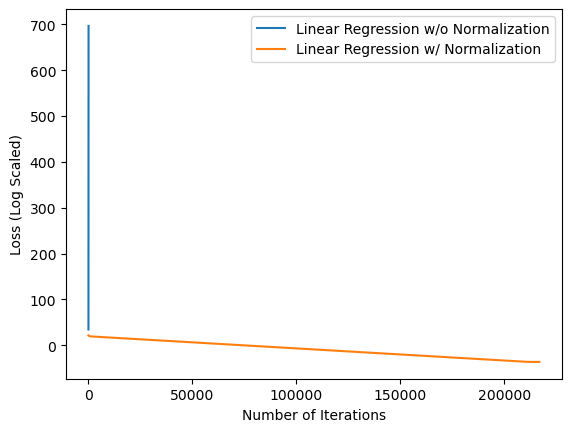

In [5]:
plt.plot(np.log(reg.loss), label='Linear Regression w/o Normalization')
plt.plot(np.log(reg_norm.loss), label='Linear Regression w/ Normalization')
plt.xlabel("Number of Iterations")
plt.ylabel("Loss (Log Scaled)")
plt.legend()
plt.show()

<font color='red'>**Question 1: What conclusions can you draw from this experiment? Did normalization help? How and why?**
</font>

 - **Answer:**

# Experiment 2: Real-World Data

After you complete the first experiment, let's see how our model performs against real-world data.

The below dataset is taken from the [Boston Housing dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html), where there are 13 features and 1 target variable.

0. CRIM - per capita crime rate by town
1. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
2. INDUS - proportion of non-retail business acres per town.
3. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
4. NOX - nitric oxides concentration (parts per 10 million)
5. RM - average number of rooms per dwelling
6. AGE - proportion of owner-occupied units built prior to 1940
7. DIS - weighted distances to five Boston employment centres
8. RAD - index of accessibility to radial highways
9. TAX - full-value property-tax rate per \$10,000
10. PTRATIO - pupil-teacher ratio by town
11. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
12. LSTAT - \% lower status of the population
13. MEDV (**TARGET VARIABLE y**) - Median value of owner-occupied homes in $1000's

In [13]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
df = pd.read_csv(url, delimiter='\s+', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [14]:
X, y = np.array(df.drop(13, axis=1)), np.array(df[13])

In [15]:
X.min(axis = 0)

array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00])

Now, let's use the data to fit our model

In [16]:
%%time
reg = Linear_Regression(num_iter=100000, normalize=True)
reg.fit(X,y)
print(f'\nNumber of total iterations: {len(reg.loss)} \nBest Loss: {min(reg.loss)}')

Start Training
-----------------------
Iteration: 0
Coef: [[ 0.81045712]
 [-0.47331018]
 [ 0.63746847]
 [-0.38473263]
 [ 0.39776298]
 [-0.38325194]
 [-0.96159562]
 [-0.82964562]
 [ 0.50342397]
 [ 0.11869295]
 [-0.71150049]
 [ 0.70507304]
 [ 0.80242598]
 [ 0.60025539]]
Loss: 289452.96452871733
-----------------------
End Training

Number of total iterations: 100000 
Best Loss: 11337.125568588152
CPU times: user 3.01 s, sys: 11 ms, total: 3.02 s
Wall time: 3.03 s


Let's visualize the loss curve of our model on this dataset

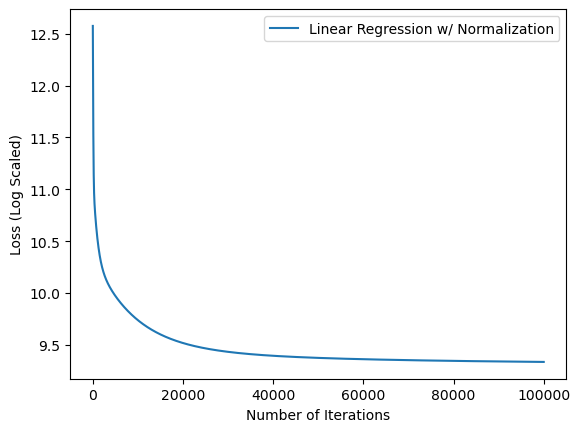

In [17]:
plt.plot(np.log(reg.loss), label='Linear Regression w/ Normalization')
plt.xlabel("Number of Iterations")
plt.ylabel("Loss (Log Scaled)")
plt.legend()
plt.show()

To verify our model, we can compare our model's performance with respect to the linear regression model implemented in scikit-learn (a.k.a. `sklearn`). Scikit-learn is a popular machine learning library in python that provides many classical machine learning algorithms for many different tasks (regression, classification, clustering, etc). It also contains utility functions for preprocessing, calculating metrics, etc.

If you implemented your model correctly, you should get a very similar output (difference < 1e-3) for RMSE (Root Mean Squared Error) compared to sklearn linear regressor's RMSE.

In [20]:
m, n = df.shape
X_norm = X.copy()

# TODO: normalize X using the procedure in your model implementation

x_max = np.zeros((1, X.shape[1]))
x_min = np.zeros((1, X.shape[1]))
        
for i in range(X.shape[1]):
    x_max[:, i] = X[:, i].max() #[[996]]  column expression
    x_min[:, i] = X[:, i].min() #[[1]]
        


X_norm = (X - x_min)/(x_max - x_min)

# Let's build a model with sklearn
lr = LinearRegression()
lr.fit(X_norm,y)

#Compare Root Mean Squared Error.
print(f"Our Model's RMSE: {(sum((reg.predict(X).flatten() - y)**2)/m)**0.5}\
\nSklearn Model's RMSE: {(sum((lr.predict(X_norm) - y)**2)/m)**0.5}")

Our Model's RMSE: 4.733432845112103
Sklearn Model's RMSE: 4.679191295697282


Now, let's have some tweaks with our custom model. First, let's see if an interception (i.e. bias) really helps with our model's performance on the real-world data.

In [21]:
%%time
%%capture
reg_bias = Linear_Regression(num_iter=100000, normalize=True, intercept=True)
reg_no_bias = Linear_Regression(num_iter=100000, normalize=True, intercept=False)
reg_bias.fit(X,y)
reg_no_bias.fit(X,y)

CPU times: user 5.77 s, sys: 36.7 ms, total: 5.81 s
Wall time: 5.82 s


In [22]:
print(f"Our Model's RMSE with Interception: {(sum((reg_bias.predict(X).flatten() - y)**2)/m)**0.5}\
\nOur Model's RMSE without Interception: {(sum((reg_no_bias.predict(X).flatten() - y)**2)/m)**0.5}")

Our Model's RMSE with Interception: 4.737946573715472
Our Model's RMSE without Interception: 5.254529362369724


<font color='red'>**Question 2: What conclusions can you make here? Does the addition of an intercept make our model perform better?**</font>

* **Answer:** 

Second, let's see if regularization can further help with decreasing our model's loss. Since regularization deals with the problem of overfitting, we need to check our model's performance on the "unseen" data. Here, we will split our data into two parts: `training set` and `test set`, where our model will be fit with the training set, and the performance will be evaluated based on the test set.

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)
m, n = X_test.shape

In [82]:

reg = Linear_Regression(num_iter=100000, normalize=True)
reg.fit(X_train, y_train)
# Feel free to tune the lambda hyperparameter for better performance when penalty (regularization) is applied
reg_l1 = Linear_Regression(num_iter=100000, normalize=True, penalty='l1')
reg_l1.fit(X_train, y_train)
reg_l2 = Linear_Regression(num_iter=100000, normalize=True, penalty='l2')
reg_l2.fit(X_train, y_train)


Start Training
-----------------------
Iteration: 0
Coef: [[-0.57736959]
 [ 0.59478195]
 [ 0.37439318]
 [-0.44043297]
 [ 0.66355874]
 [-0.59104251]
 [-0.05377765]
 [ 0.26215836]
 [ 0.19141868]
 [ 0.70733527]
 [ 0.55569335]
 [ 0.62934437]
 [-0.16659532]
 [-0.94930501]]
Loss: 204154.40911206274
-----------------------
End Training
Start Training
-----------------------
Iteration: 0
Coef: [[-0.45494358]
 [ 0.8411263 ]
 [ 0.36505807]
 [-0.69052664]
 [-0.64867271]
 [-0.33430005]
 [-0.36610993]
 [-0.30498267]
 [-0.29404583]
 [ 0.89664606]
 [-0.34728015]
 [ 0.50471126]
 [-0.04516179]
 [-0.81709748]]
Loss: [222130.06870687]
-----------------------
End Training
Start Training
-----------------------
Iteration: 0
Coef: [[-0.87227146]
 [-0.0495653 ]
 [-0.3152829 ]
 [-0.35760045]
 [-0.2163646 ]
 [-0.90969849]
 [-0.94223102]
 [ 0.23453808]
 [-0.8576643 ]
 [ 0.57299296]
 [ 0.93057842]
 [ 0.7496877 ]
 [-0.81640705]
 [ 0.74316341]]
Loss: [202128.3603304]
-----------------------
End Training


In [83]:
print(f"Our Model's RMSE: {(sum((reg.predict(X_test).flatten() - y_test)**2)/m)**0.5}")
print(f"Our L1 Regularized Model's RMSE: {(sum((reg_l1.predict(X_test).flatten() - y_test)**2)/m)**0.5}")
print(f"Our L2 Regularized Model's RMSE: {(sum((reg_l2.predict(X_test).flatten() - y_test)**2)/m)**0.5}")




Our Model's RMSE: 4.652134244705093
Our L1 Regularized Model's RMSE: 4.650223911993742
Our L2 Regularized Model's RMSE: 4.662717194789035


<font color='red'> **Question 3: What conclusions can you make here? Does the addition of a regularization make our model perform better on the test set? Why does the addition of it make our model perform better/worse?** </font>

* **Answer:**

Finally, let's see the role of an adaptive learning rate. Let's see our model's performance when adaptive learning rate is disabled.

In [84]:
m, n = X.shape

In [85]:
%%time
%%capture
reg = Linear_Regression(num_iter=100000, normalize=True)
reg.fit(X, y)
reg_alt = Linear_Regression(num_iter=100000, normalize=True, adaptive=False)
reg_alt.fit(X, y)

CPU times: user 6 s, sys: 115 ms, total: 6.11 s
Wall time: 6.46 s


In [86]:
print(f"Our Model's RMSE with Adaptive LR: {(sum((reg.predict(X).flatten() - y)**2)/m)**0.5}\
\nOur Model's RMSE without Adaptive LR: {(sum((reg_alt.predict(X).flatten() - y)**2)/m)**0.5}")

Our Model's RMSE with Adaptive LR: 4.738022806368028
Our Model's RMSE without Adaptive LR: 4.737719846698711


<font color='red'> **Question 4: What conclusions can you make here? Does the addition of an adaptive learning rate make our model perform better? What are your reasonings here?**</font>

* **Answer:**